In [1]:
import os
import cv2
import pandas as pd

# Analyse de la base de données d'entraînement

In [2]:
# Liste des répertoires contenant les images
image_dirs = ['train/aeroplane', 'train/bicycle', 'train/bus', 'train/car', 'train/horse', 
              'train/knife','train/motorcycle', 'train/person', 'train/plant', 'train/skateboard','train/train','train/truck']

In [3]:
image_data = []
for image_dir in image_dirs:
    
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        img = cv2.imread(image_path)
        height, width, _ = img.shape
        image_data.append({'file': image_file, 'width': width, 'height': height, 'dir': image_dir})

df = pd.DataFrame(image_data)

In [4]:
df['dir'] = df['dir'].str.replace('train/', '', regex=False)

In [5]:
df.rename(columns={'dir': 'object_type'}, inplace=True)

In [12]:
df.head(5)

,file,width,height,object_type
0,src_2_02691156_1d6afc44b053ab07941d71475449eb2...,384,216,aeroplane
1,src_1_02691156_7f09b3b11ae3f22dbe13ce34aa7c0c1...,384,216,aeroplane
2,src_2_02691156_7aac10eb5b285098774a720fca15e35...,384,216,aeroplane
3,src_2_02691156_1b0b1d2cb9f9d5c0575bd26acccafab...,384,216,aeroplane
4,src_2_02691156_4def53f149137451b0009f08a96f38a...,384,216,aeroplane


In [14]:
df.describe()

,width,height
count,152397.000000,152397.000000
mean,383.998898,216.001102
std,0.430349,0.430349
min,216.000000,216.000000
25%,384.000000,216.000000
50%,384.000000,216.000000
75%,384.000000,216.000000
max,384.000000,384.000000


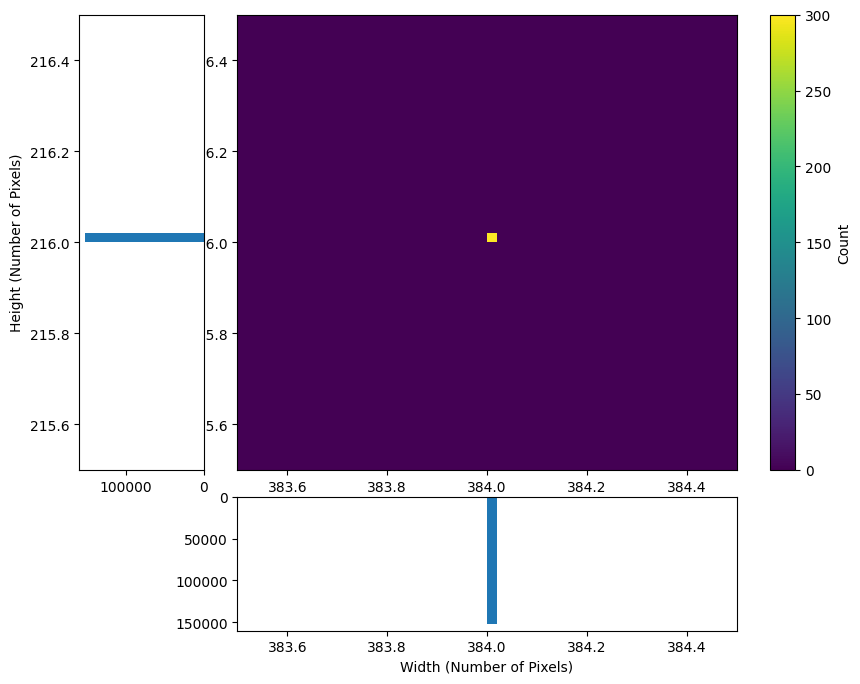

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the figure
fig = plt.figure(figsize=(10, 8))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2, width_ratios=[5, 20, 1, 1])
main_ax = fig.add_subplot(grid[:-1, 1])
y_hist = fig.add_subplot(grid[:-1, 0], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1], sharex=main_ax)
cax = fig.add_subplot(grid[:-1, 2])

# Plotting the main 2D histogram with mappable, with vmax set to 3000
mappable = main_ax.hist2d(df['width'], df['height'], bins=50, cmap='viridis', vmax=300)

# Plotting the marginal histograms
x_hist.hist(df['width'], bins=50, align='mid')
y_hist.hist(df['height'], bins=50, orientation='horizontal', align='mid')

# Adjusting the appearance
x_hist.invert_yaxis()
y_hist.invert_xaxis()

# Set detailed label for x histogram
x_hist.set_xlabel("Width (Number of Pixels)")
# Set detailed label for y histogram
y_hist.set_ylabel("Height (Number of Pixels)")

# Adding the colorbar
plt.colorbar(mappable=mappable[3], cax=cax, label='Count')
plt.show()


# Analyse de la base de données de test

In [10]:
trunk_list = ['test/trunk']*20

for i in range(0,20):
    if i+1 <10:
        trunk_list[i] += '0'+ str(i+1)
    else :
        trunk_list[i] += str(i+1)

print(trunk_list)

['test/trunk01', 'test/trunk02', 'test/trunk03', 'test/trunk04', 'test/trunk05', 'test/trunk06', 'test/trunk07', 'test/trunk08', 'test/trunk09', 'test/trunk10', 'test/trunk11', 'test/trunk12', 'test/trunk13', 'test/trunk14', 'test/trunk15', 'test/trunk16', 'test/trunk17', 'test/trunk18', 'test/trunk19', 'test/trunk20']


In [21]:
image_data = []
for image_dir in trunk_list:
    
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        img = cv2.imread(image_path)
        height, width, _ = img.shape
        image_data.append({'file': image_file, 'width': width, 'height': height, 'dir': image_dir})

df_test = pd.DataFrame(image_data)

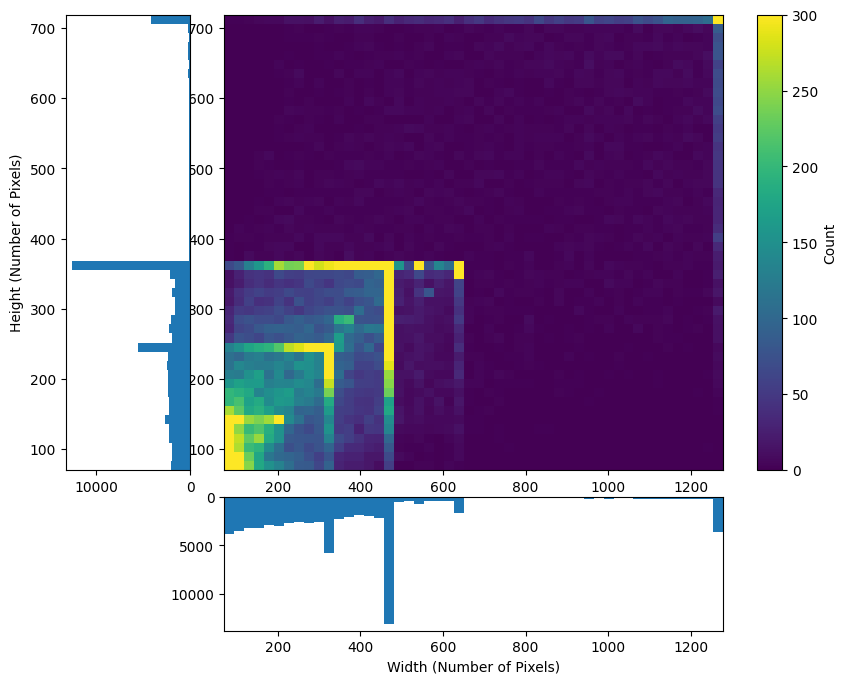

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare the figure
fig = plt.figure(figsize=(10, 8))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2, width_ratios=[5, 20, 1, 1])
main_ax = fig.add_subplot(grid[:-1, 1])
y_hist = fig.add_subplot(grid[:-1, 0], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1], sharex=main_ax)
cax = fig.add_subplot(grid[:-1, 2])

# Plotting the main 2D histogram with mappable, with vmax set to 3000
mappable = main_ax.hist2d(df_test['width'], df_test['height'], bins=50, cmap='viridis', vmax=300)

# Plotting the marginal histograms
x_hist.hist(df_test['width'], bins=50, align='mid')
y_hist.hist(df_test['height'], bins=50, orientation='horizontal', align='mid')

# Adjusting the appearance
x_hist.invert_yaxis()
y_hist.invert_xaxis()

# Set detailed label for x histogram
x_hist.set_xlabel("Width (Number of Pixels)")
# Set detailed label for y histogram
y_hist.set_ylabel("Height (Number of Pixels)")

# Adding the colorbar
plt.colorbar(mappable=mappable[3], cax=cax, label='Count')

plt.show()


In [28]:
df_test.head(5)

,file,width,height,dir
0,aee27c09dc17c298fb661b36d3387511.jpg,479,359,test/trunk01
1,77bd5c0a0ee6095a1ef6b75a8e0cc713.jpg,94,148,test/trunk01
2,cd4427fb3c7b2a782a7dd1539d5f0f8a.jpg,1279,719,test/trunk01
3,24d1d1368947149b25e7d6003fd6f846.jpg,273,239,test/trunk01
4,6d269505fc9f6583cb6b4e2d96046821.jpg,1279,226,test/trunk01


In [2]:
df_test.__len__()

5196

En tout 9468, 5196 avions et 4272 vélos

Le jeu de données de test comporte 72372 images. La taille des images est beaucoup plus varié que pour le jeu de données de test. En effet on remarque que la largeur de l'image peut aller de 70 à 127pixels et la longuer de 70 à 719 de pixels. De plus nous avons une variance de 293,8 pour la largeur et de 158,2 pour la longueur ce qui est beaucoup plus que les 0,43 observés précedemment.

# Analyse du jeu de validation

# Liste des répertoires contenant les images

In [23]:
image_dirs_val = ['validation/aeroplane', 'validation/bicycle', 'validation/bus', 'validation/car', 'validation/horse',
               'validation/knife','validation/motorcycle', 'validation/person', 'validation/plant', 
               'validation/skateboard','validation/train','validation/truck']

In [24]:
image_data = []
for image_dir in image_dirs_val:
    
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        img = cv2.imread(image_path)
        height, width, _ = img.shape
        image_data.append({'file': image_file, 'width': width, 'height': height, 'dir': image_dir})

df_val = pd.DataFrame(image_data)

In [36]:
df_val.head(5)

,file,width,height,dir
0,aeroplane_157679.jpg,640,318,validation/aeroplane
1,aeroplane_156567.jpg,640,349,validation/aeroplane
2,aeroplane_159898.jpg,586,225,validation/aeroplane
3,aeroplane_156573.jpg,151,98,validation/aeroplane
4,aeroplane_1793775.jpg,143,150,validation/aeroplane


In [39]:
df_val.describe()

,width,height
count,55388.000000,55388.000000
mean,275.599913,228.240431
std,180.958418,132.049515
min,71.000000,71.000000
25%,127.000000,118.000000
50%,210.000000,191.000000
75%,396.000000,315.000000
max,640.000000,640.000000


Dans le jeu de validation nous avons 55 388 images. On a une variance plus faible pour la largeur et la longueur des images (180,9 et 132,04) ainsi que des images plus petites (largeur moyenne de 275 pixels et longueur moyenne de 228 pixels).

In [40]:
df_test.describe()

,width,height
count,72372.000000,72372.000000
mean,406.713232,287.794009
std,293.804057,158.228341
min,70.000000,70.000000
25%,201.000000,175.000000
50%,338.000000,258.000000
75%,479.000000,359.000000
max,1279.000000,719.000000


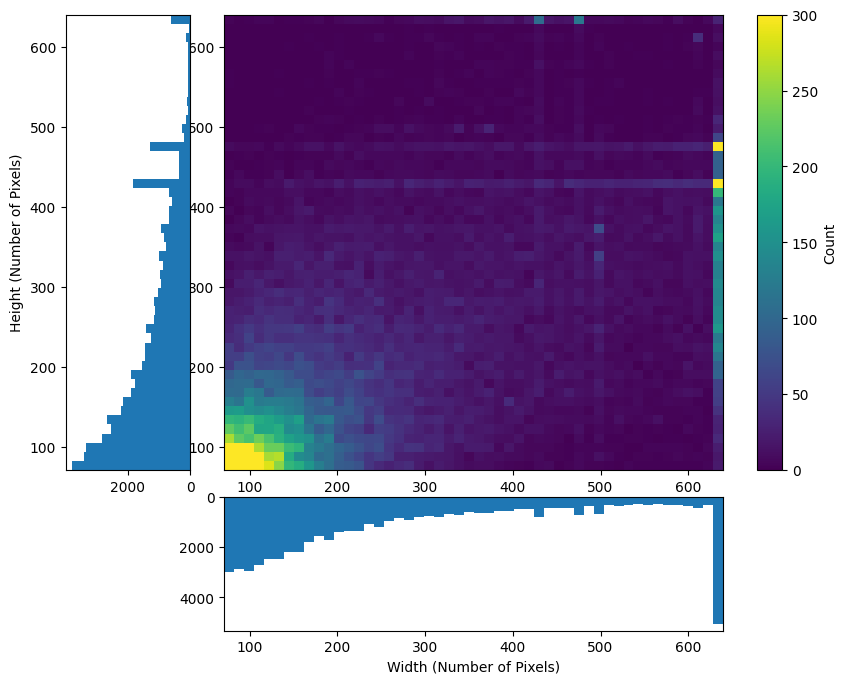

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the figure
fig = plt.figure(figsize=(10, 8))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2, width_ratios=[5, 20, 1, 1])
main_ax = fig.add_subplot(grid[:-1, 1])
y_hist = fig.add_subplot(grid[:-1, 0], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1], sharex=main_ax)
cax = fig.add_subplot(grid[:-1, 2])

# Plotting the main 2D histogram with mappable, with vmax set to 3000
mappable = main_ax.hist2d(df_val['width'], df_val['height'], bins=50, cmap='viridis', vmax=300)

# Plotting the marginal histograms
x_hist.hist(df_val['width'], bins=50, align='mid')
y_hist.hist(df_val['height'], bins=50, orientation='horizontal', align='mid')

# Adjusting the appearance
x_hist.invert_yaxis()
y_hist.invert_xaxis()

# Set detailed label for x histogram
x_hist.set_xlabel("Width (Number of Pixels)")
# Set detailed label for y histogram
y_hist.set_ylabel("Height (Number of Pixels)")

# Adding the colorbar
plt.colorbar(mappable=mappable[3], cax=cax, label='Count')

plt.show()


probabilities [[0.00880295]
 [0.12823766]
 [0.09955707]
 [0.01372204]
 [0.067494  ]
 [0.02485266]
 [0.05783959]
 [0.10752849]
 [0.01790212]
 [0.01982865]
 [0.01687491]
 [0.01953267]
 [0.08305404]
 [0.01653317]
 [0.06356942]
 [0.03244615]
 [0.01869352]
 [0.07519977]
 [0.03714468]
 [0.04724971]
 [0.12539518]
 [0.10048323]
 [0.03716405]
 [0.03450275]
 [0.0422208 ]
 [0.11779179]
 [0.08213426]
 [0.01946251]
 [0.02223247]
 [0.0273059 ]
 [0.09770069]
 [0.03809842]
 [0.13321197]
 [0.1267547 ]
 [0.10757609]
 [0.03783167]
 [0.02670777]
 [0.04586325]
 [0.05613233]
 [0.14016312]
 [0.22501118]
 [0.08020485]
 [0.1058204 ]
 [0.01936312]
 [0.01530217]
 [0.03969957]
 [0.17366009]
 [0.02203358]
 [0.24355157]
 [0.09180481]
 [0.09161742]
 [0.01705515]
 [0.12192247]
 [0.16121167]
 [0.06787429]
 [0.0826482 ]
 [0.02888137]
 [0.1125418 ]
 [0.16205141]
 [0.09548502]
 [0.11081993]
 [0.01970751]
 [0.04568011]
 [0.11197017]
 [0.12862563]
 [0.0418729 ]
 [0.2062352 ]
 [0.14139238]
 [0.04036068]
 [0.05008562]
 [0.02

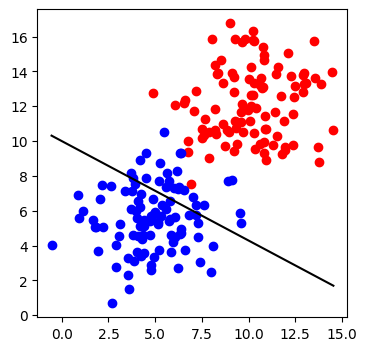

In [13]:
def sigmoid(score):
   return 1/(1+ np.exp(-score)) 
def calc_error(line_parameter, points, y ):
   m= points.shape[0]
   p = sigmoid(points * line_parameter)
   cross_entropy = -(1/m)*(np.log(p).T * y + np.log(1-p).T * (1-y))
   return cross_entropy
   
n_pts = 100
np.random.seed(0)
bias = np.ones(n_pts)
top_reg = np.array([np.random.normal(10, 2, n_pts),np.random.normal(12, 2, n_pts),bias]).T
bottom_reg = np.array([np.random.normal(5, 2, n_pts),np.random.normal(6, 2, n_pts),bias]).T
all_points = np.vstack((top_reg,bottom_reg))
w1 = -0.2
w2 = -0.35
b = 3.5
line_parameter = np.matrix([w1,w2,b]).T
x1= np.array([bottom_reg[:, 0].min(), top_reg[:, 0].max()])
x2 = -b/w2  + x1 * (-w1/w2)
linear_combination = all_points*line_parameter
probabilities = sigmoid(linear_combination)
print("probabilities",probabilities) #gives probability of each point being in positive region
y= np.array([np.zeros(n_pts),np.ones(n_pts)]).reshape(n_pts*2, 1)
print('Cross Entropy Loss:',(calc_error(line_parameter,all_points,y)))
_,axis = plt.subplots(figsize=(4, 4))
axis.scatter(top_reg[:, 0], top_reg[:, 1], color = 'r')
axis.scatter(bottom_reg[:, 0], bottom_reg[:, 1], color = 'b')
plt.show()


iteration: 0 loss: [[4.06773708]]
iteration: 1 loss: [[3.92767226]]
iteration: 2 loss: [[3.78770312]]
iteration: 3 loss: [[3.64784817]]
iteration: 4 loss: [[3.50813002]]
iteration: 5 loss: [[3.36857641]]
iteration: 6 loss: [[3.22922148]]
iteration: 7 loss: [[3.09010735]]
iteration: 8 loss: [[2.95128612]]
iteration: 9 loss: [[2.81282244]]
iteration: 10 loss: [[2.67479666]]
iteration: 11 loss: [[2.53730878]]
iteration: 12 loss: [[2.4004835]]
iteration: 13 loss: [[2.26447627]]
iteration: 14 loss: [[2.12948097]]
iteration: 15 loss: [[1.99573907]]
iteration: 16 loss: [[1.86355079]]
iteration: 17 loss: [[1.7332881]]
iteration: 18 loss: [[1.60540985]]
iteration: 19 loss: [[1.48047841]]
iteration: 20 loss: [[1.35917738]]
iteration: 21 loss: [[1.24232842]]
iteration: 22 loss: [[1.13090441]]
iteration: 23 loss: [[1.02603296]]
iteration: 24 loss: [[0.92898009]]
iteration: 25 loss: [[0.84109726]]
iteration: 26 loss: [[0.76370899]]
iteration: 27 loss: [[0.6979217]]
iteration: 28 loss: [[0.64436238]

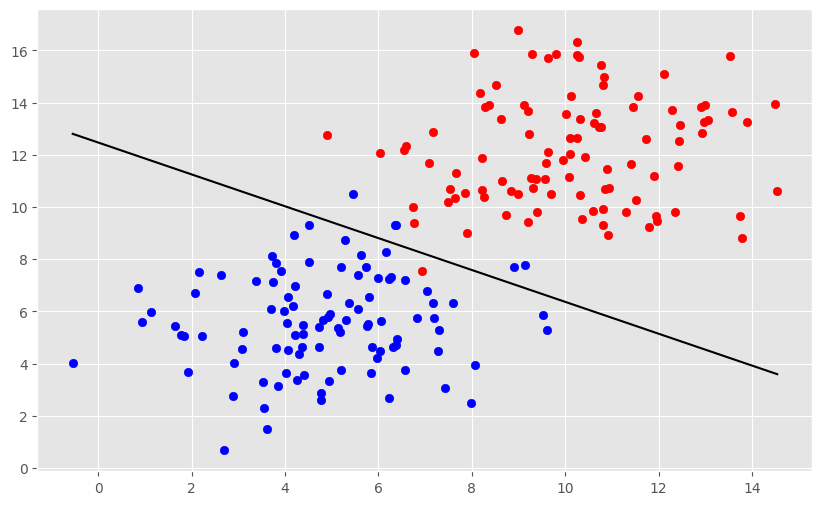

Final w1: -0.22213936979656446 w2: -0.36403338420952003 bias: 4.538734083738508


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(score):
    return 1 / (1 + np.exp(-score))

def calc_error(line_parameter, points, y):
    m = points.shape[0]
    p = sigmoid(points * line_parameter)
    cross_entropy = -(1/m) * (np.log(p).T * y + np.log(1-p).T * (1-y))
    return cross_entropy

def gradient_descent(line_parameter, points, y, alpha):
    m = points.shape[0]
    for i in range(5000):
        p = sigmoid(points * line_parameter)  # sigmoid_activation
        gradient = (points.T * (p-y)) * (alpha/m)
        line_parameter = line_parameter - gradient
        
        print('iteration:', i, 'loss:', calc_error(line_parameter, all_points, y))
    
    w1 = line_parameter.item(0)
    w2 = line_parameter.item(1)
    b = line_parameter.item(2)
    
    x1 = np.array([bottom_reg[:, 0].min(), top_reg[:, 0].max()])
    x2 = -b/w2 + x1 * (-w1/w2)
    
    plt.style.use("ggplot")
    _, axis = plt.subplots(figsize=(10, 6))
    axis.scatter(top_reg[:, 0], top_reg[:, 1], color='r')
    axis.scatter(bottom_reg[:, 0], bottom_reg[:, 1], color='b')
    axis.plot(x1, x2, color='black')  # Tracé de la ligne de décision
    
    plt.show()

    print("Final w1:", w1, "w2:", w2, "bias:", b)

n_pts = 100
np.random.seed(0)
bias = np.ones(n_pts)
top_reg = np.array([np.random.normal(10, 2, n_pts), np.random.normal(12, 2, n_pts), bias]).T
bottom_reg = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6, 2, n_pts), bias]).T
all_points = np.vstack((top_reg, bottom_reg))
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)
initial_line_parameters = np.matrix([np.random.randn(), np.random.randn(), np.random.randn()]).T

# Appeler la fonction de descente de gradient avec les paramètres appropriés
alpha = 0.01
gradient_descent(initial_line_parameters, all_points, y, alpha)
